In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [2]:
db= pd.read_csv('C:/Users/shrad/Desktop/pro/diabetes.csv')

In [3]:
db['glucose'].var()

1022.2483142519557

In [9]:
x = db.columns
x


Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [10]:
y=db.var()
y

pregnant       11.354056
glucose      1022.248314
bp            374.647271
skin          254.473245
insulin     13281.180078
bmi            62.159984
pedigree        0.109779
age           138.303046
label           0.227483
dtype: float64

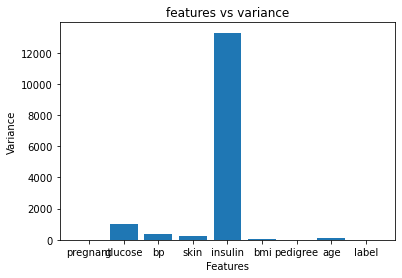

In [11]:
# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('Features')
plt.ylabel("Variance")
plt.title('features vs variance')
plt.show()

In [12]:
cov = db.corr(method='pearson')
print(cov)

          pregnant   glucose        bp      skin   insulin       bmi  \
pregnant  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683   
glucose   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071   
bp        0.141282  0.152590  1.000000  0.207371  0.088933  0.281805   
skin     -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573   
insulin  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859   
bmi       0.017683  0.221071  0.281805  0.392573  0.197859  1.000000   
pedigree -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647   
age       0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242   
label     0.221898  0.466581  0.065068  0.074752  0.130548  0.292695   

          pedigree       age     label  
pregnant -0.033523  0.544341  0.221898  
glucose   0.137337  0.263514  0.466581  
bp        0.041265  0.239528  0.065068  
skin      0.183928 -0.113970  0.074752  
insulin   0.185071 -0.042163  0.130548  
bmi       0.140647  0.036242  0.2

<AxesSubplot:>

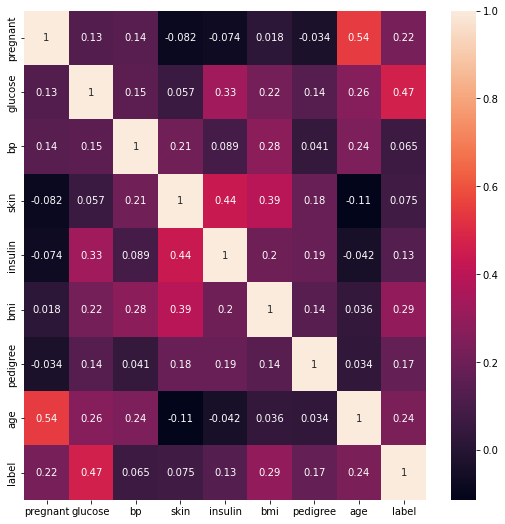

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (9,9))

sns.heatmap(cov, annot = True)

In [16]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(db)) #scaling the data
scaled_data


,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [17]:

#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-1.756947,-1.111743,0.208791
1,1.507421,0.559406,-0.650628
2,-0.650822,-1.929576,2.007740
3,1.587398,1.065075,-0.474442
4,-2.483374,2.359563,2.925515


In [28]:
v = data_pca.var()
c= data_pca.columns
c


Index(['PC1', 'PC2', 'PC3'], dtype='object')

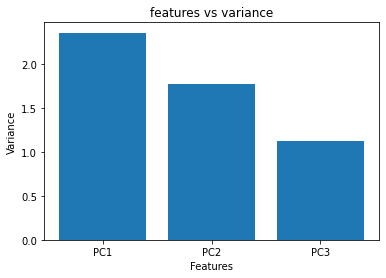

In [29]:
# Simple Bar Plot
plt.bar(c,v)
plt.xlabel('Features')
plt.ylabel("Variance")
plt.title('features vs variance')
plt.show()

<AxesSubplot:>

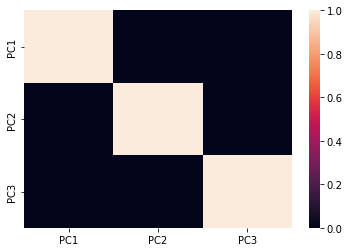

In [18]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())
